<a href="https://colab.research.google.com/github/olesia-za/python_for_ds_tasks/blob/main/OZ_Done_10_HW3_Data_visualization_with_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [12]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

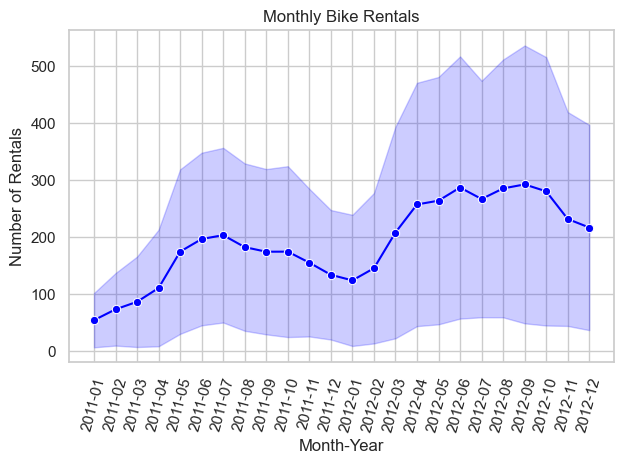

In [ ]:
sns.lineplot(data=df, x='month_year', y='count', marker='o', color='blue', errorbar='sd')
plt.xticks(rotation=75)
plt.title('Monthly Bike Rentals')
plt.xlabel('Month-Year')
plt.ylabel('Number of Rentals')
plt.tight_layout()
plt.show();
# найбільша невизначеність в даних при збільшенні кількості орендованих велосипедів - з травня по жовтень

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

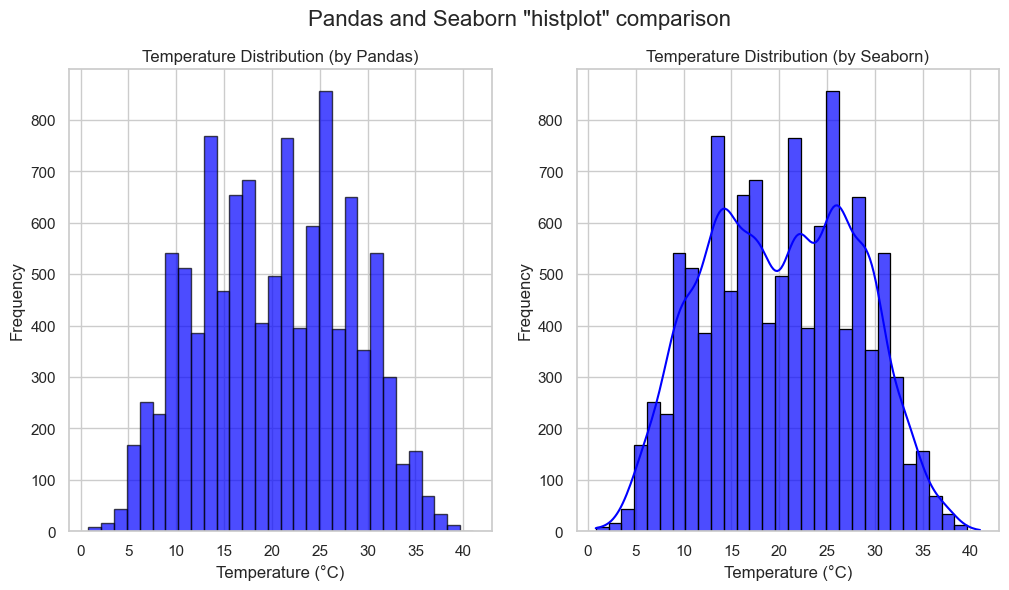

In [ ]:
plt.figure(figsize=(12, 6))
plt.suptitle('Pandas and Seaborn "histplot" comparison', fontsize=16)

# Гістограма розподілу температури
df['temp'].plot.hist(bins=30, color = 'blue', edgecolor='black', alpha=0.7, ax=plt.subplot(1, 2, 1))
plt.title('Temperature Distribution (by Pandas)')
plt.xlabel('Temperature (°C)');

sns.histplot(df['temp'], bins=30, kde=True, color='blue', edgecolor='black', alpha=0.7, ax=plt.subplot(1, 2, 2))
plt.title('Temperature Distribution (by Seaborn)')
plt.ylabel('Frequency')
plt.xlabel('Temperature (°C)');
# 1) візуально не бачу різниці між гістограмами, але в seaborn є можливість додати KDE
# 2) KDE (функція густини розподілу), що дозволяє краще оцінити розподіл даних - апроксимує та згладжує дані відображені на гістограмі

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

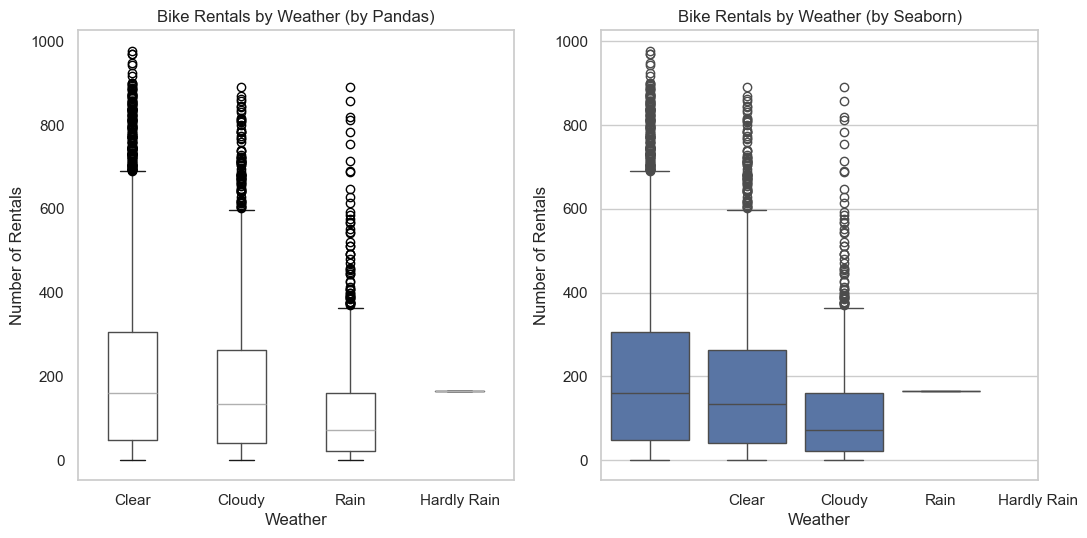

In [ ]:
plt.figure(figsize=(12, 6))
plt.suptitle('Pandas and Seaborn "boxplot" comparison', fontsize=16)

df.boxplot(column='count', by='weather', grid=False, ax=plt.subplot(1, 2, 1))
plt.title('Bike Rentals by Weather (by Pandas)')
plt.suptitle('')
plt.xlabel('Weather')
plt.xticks(df['weather'].unique(),['Clear', 'Cloudy', 'Rain', 'Hardly Rain'])
plt.ylabel('Number of Rentals');

sns.boxplot(data=df, x='weather', y='count', ax=plt.subplot(1, 2, 2))
plt.title('Bike Rentals by Weather (by Seaborn)')
plt.xlabel('Weather')
plt.xticks(df['weather'].unique(),['Clear', 'Cloudy', 'Rain', 'Hardly Rain'])
plt.ylabel('Number of Rentals');
#  1) візуально не бачу різниці між boxplot cуттєвої різниці лише трохи різна розмірпрямокутників і вони заповнені кольором, але в seaborn чомусь замінені 
#   підписи під віссю X не збігаються з підписами в Pandas - посунуті на 1 елемент вправо 


<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


In [70]:
df_corr = df[['count', 'registered', 'casual', 'windspeed', 'humidity', 'temp', 'atemp']].corr()
df_corr


,count,registered,casual,windspeed,humidity,temp,atemp
count,1.000000,0.970948,0.690414,0.101369,-0.317371,0.394454,0.389784
registered,0.970948,1.000000,0.497250,0.091052,-0.265458,0.318571,0.314635
casual,0.690414,0.497250,1.000000,0.092276,-0.348187,0.467097,0.462067
windspeed,0.101369,0.091052,0.092276,1.000000,-0.318607,-0.017852,-0.057473
humidity,-0.317371,-0.265458,-0.348187,-0.318607,1.000000,-0.064949,-0.043536
temp,0.394454,0.318571,0.467097,-0.017852,-0.064949,1.000000,0.984948
atemp,0.389784,0.314635,0.462067,-0.057473,-0.043536,0.984948,1.000000


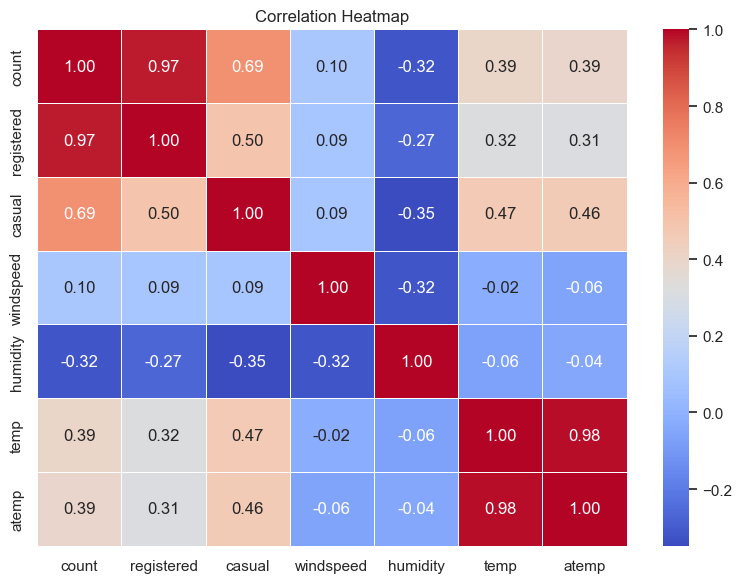

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show();
#  1) з загальною кількістю орендованих велосипедів найбільше корелюють зареєстровані користувачі та твипадкові користувачі, 
#   також є певна кореляція з температурою та відчувається температура
# 2) кореляція між temp і atemp близька до 1,бо це майже та сама змінна  - переважно не суттєво відрізняються значення
# 3) humidity має невелику негативну кореляцію з кількістю орендованих велосипедів у загальній кількості та зареєстрованими користувачами, випадковими користувачами
#  що можна пояснити тим, що збільшення вологість повітря може погіршувати комфортність використання велосипедів
# також можна помітити, що збільшення швидкості вітру має деяку негативну кореляцію з вологістю , що можна пояснити тим , що сильний вітер може зменшувати вологість 


## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


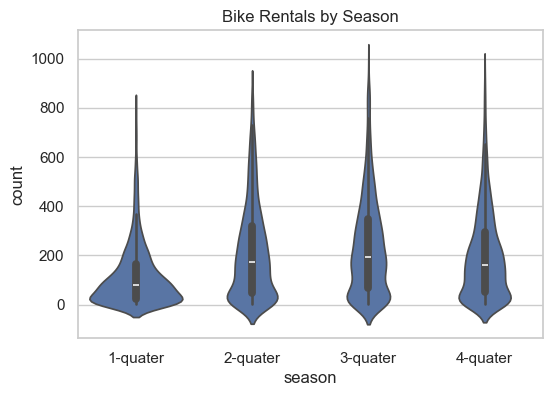

In [ ]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x='season', y='count');
season_labels = ['1-quater', '2-quater', '3-quater', '4-quater']
plt.xticks(range(4), season_labels)
plt.title('Bike Rentals by Season');
# plt.xticks(df['season'].unique(), ['1 quater', '2 quater ', '3 quater', ' 4 quater'])
# 1) щільність розподілу
# 2) у 3ому кварталі найбільша варіабельність оренди, що можна пояснити тим, в 3ому кварталі найбільше велосипедів орендують
# 3)  додатково відображається гістограма(вигляд) розподілу даних, та можна задати просто порядок значень для категорій

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

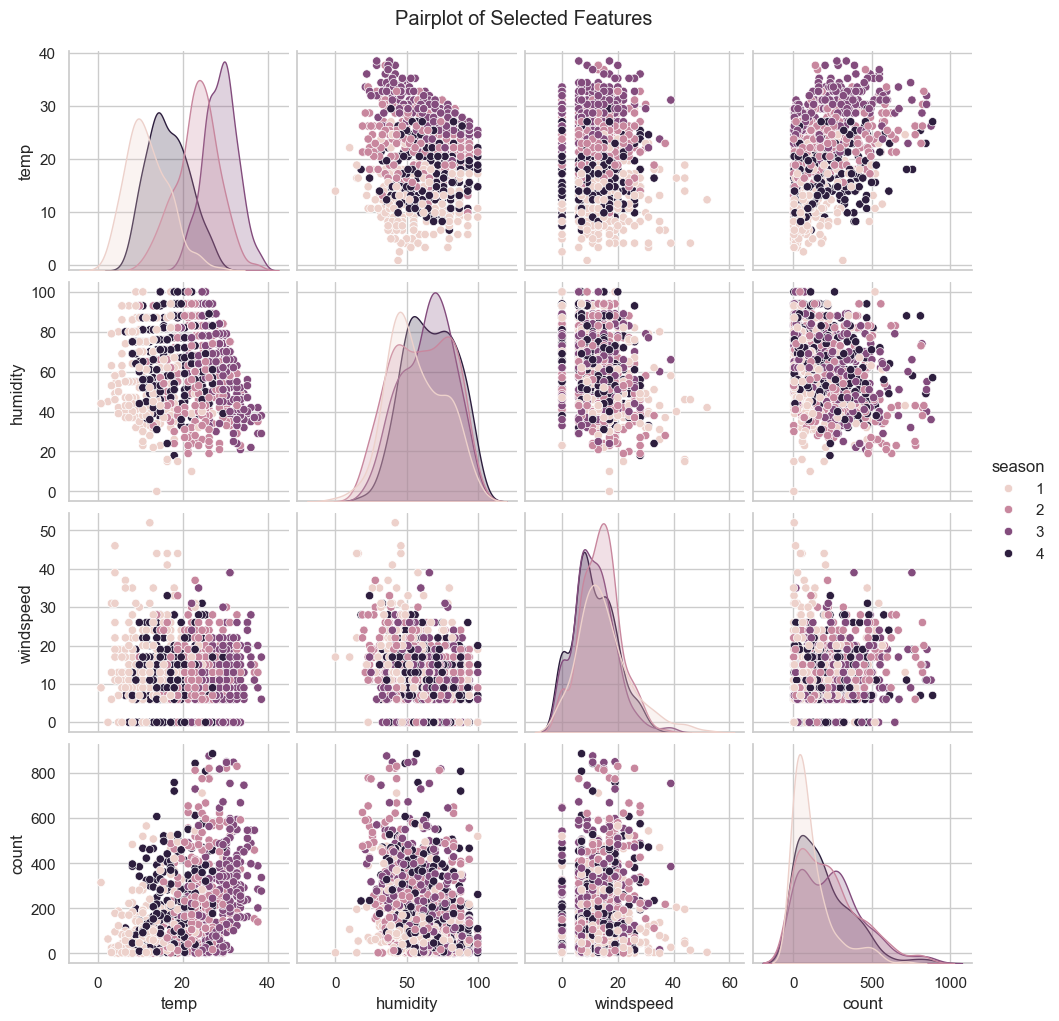

In [ ]:
sample_df = df[['temp', 'humidity', 'windspeed', 'count', 'season']].sample(1000)
# sample_df['season'] = pd.Categorical(df['season'])

sns.pairplot(sample_df, hue="season")
plt.suptitle('Pairplot of Selected Features', y=1.02);
# 1) найсильніший зв'язок між температурою та кількістю орендованих велосипедів
# 2) найбільше від сезону змінюється температура та кількість орендованих велосипедів в одному з сезонів

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

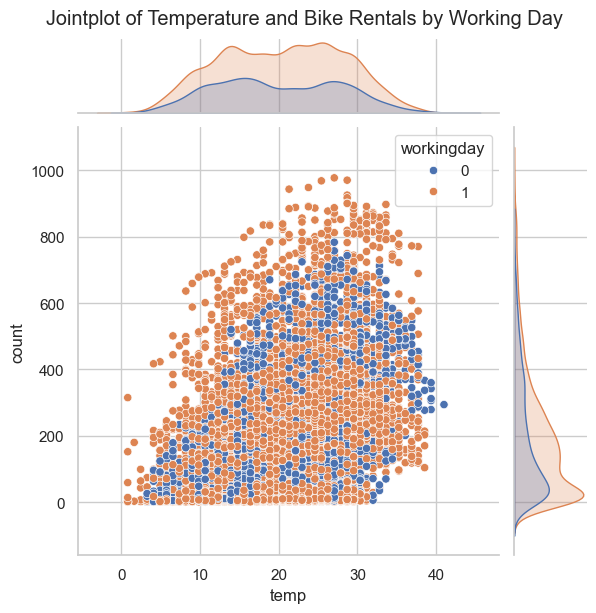

In [ ]:
sns.jointplot(data=df, x='temp', y='count', hue='workingday');
plt.suptitle('Jointplot of Temperature and Bike Rentals by Working Day', y=1.02);
# 1) KDE (розподіли) відповідної змінної для кожної hue категорії
# 2) у поведінці користувачів  в неробочі дні майже вдвічі зменшується попит на оренду велосипедів, що можна пояснити тим, що в неробочі дні менше людей їздять на роботу
